## Mi primer modelo: una regresión lineal

Vamos a construir mi primer modelo, una regresión lineal que predice la diabetes de unos usuarios en base a la variable del indice de masa corporal. 

El dataset que usaremos es el datasert de *diabetes* que podemos encontrar en datasets de la librería de sklearn.

Los pasos que seguiremos serán los siguientes:

1. Preparación de datos.
2. Separar los datos en entrenamiento y test.
3. Construir el modelo
4. Ajustar el modelo a los datos de entrenamiento.
5. Evaluar el modelo en el conjunto de test.

### Paso 1: Preparación de datos.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
%matplotlib inline

In [9]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [10]:
# Bajando los datos
diabetes = datasets.load_diabetes()

In [11]:
# Inspeccionando los datos
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

Preparando la variable dependiente, el índidce de masa corporal $X$ y la variable a predecir o independiente $y$
, la diabetes

In [12]:
X = diabetes.data[:, [2]]

In [13]:
y = diabetes.target

Dibujemos la relación entre $X$ e $y$

Text(0, 0.5, 'Disease progression')

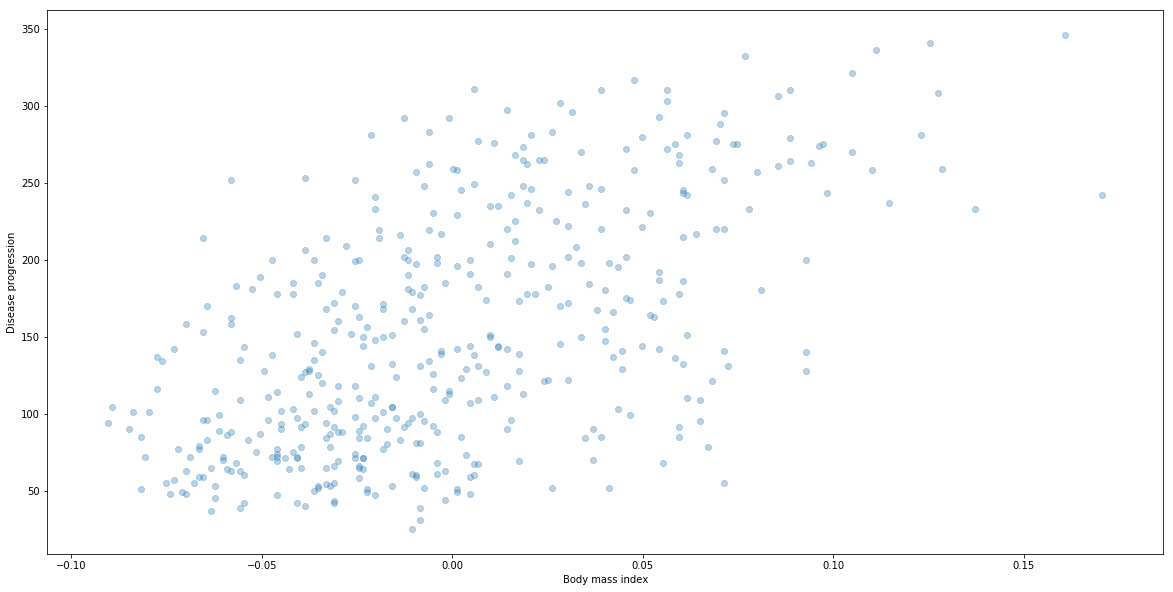

In [14]:
plt.scatter(X[:,0], y, alpha=0.3)
plt.xlabel("Body mass index")
plt.ylabel("Disease progression")

## Paso 2. Separar los datos en entrenamiento y test

In [15]:
N = len(y)

p = .8 # Porcentaje de datos que irán al conjunto de entrenamiento
np.random.seed(666)

# 1. Movemos aleatoriamente todos los indices
indices = np.arange(N)
np.random.shuffle(indices) 
print("Primeros 10 indices aleatorios")
print(indices[:10])

# 2. Cuánto data irá al test

N_train = int(p*N)
print("El conjunto de test contendrá {} filas.".format(N_train))

# 3. Hacemos los dos conjuntos
indices_train = indices[:N_train]
indices_test = indices[N_train:]

X_train = X[indices_train, :]
y_train = y[indices_train]
X_test = X[indices_test, :]
y_test = y[indices_test]

Primeros 10 indices aleatorios
[322 229 303 288 347 143 418 179   0 165]
El conjunto de test contendrá 353 filas.


## Paso 3: Construir el modelo

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

## Paso 4: Ajustar el modelo a los datos de entrenamiento

In [17]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Paso 5: Evaluar el modelo en el conjunto de test

En este primer modelo vamos a evaluar el modelo en el train y en el test:

### Evaluación en el train

Text(0.5, 1.0, 'Evaluación en los datos de entrenamiento')

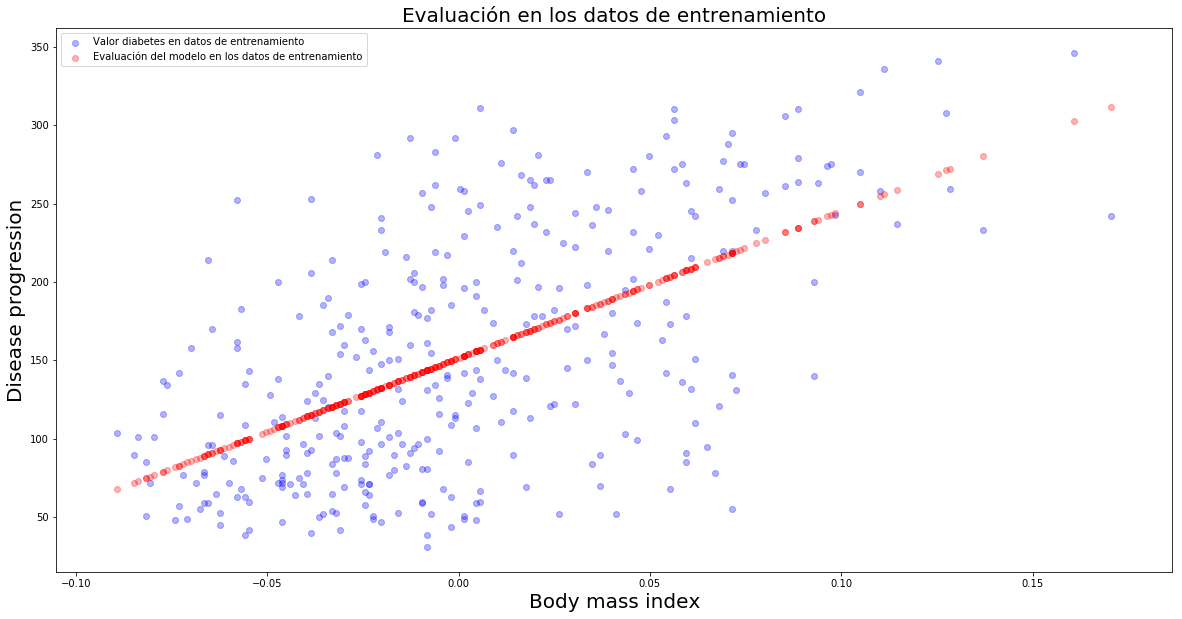

In [18]:
y_train_hat = reg.predict(X_train) 
# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.scatter(X_train, y_train_hat, alpha=0.3, c="red")
plt.xlabel("Body mass index",size=20)
plt.ylabel("Disease progression",size=20)
plt.legend(["Valor diabetes en datos de entrenamiento","Evaluación del modelo en los datos de entrenamiento"])
plt.title("Evaluación en los datos de entrenamiento",size=20)

### Evaluación en el test

Text(0.5, 1.0, 'Evaluación en los datos de test')

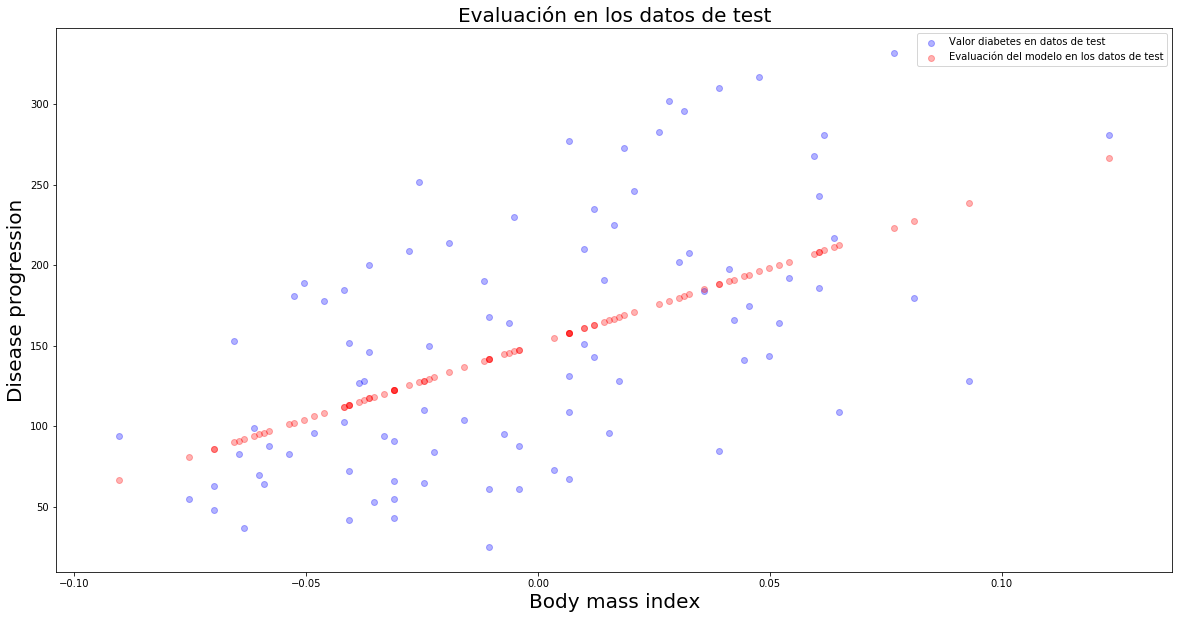

In [19]:
y_test_hat = reg.predict(X_test) 
# Ploting real data y (blue)
plt.scatter(X_test[:,0], y_test, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.scatter(X_test, y_test_hat, alpha=0.3, c="red")
plt.xlabel("Body mass index",size=20)
plt.ylabel("Disease progression",size=20)
plt.legend(["Valor diabetes en datos de test","Evaluación del modelo en los datos de test"])
plt.title("Evaluación en los datos de test",size=20)

Vamos a visualizar para algunos datos cuál es el error
$$e_i = \left|y_i - \hat{y}_i\right|$$


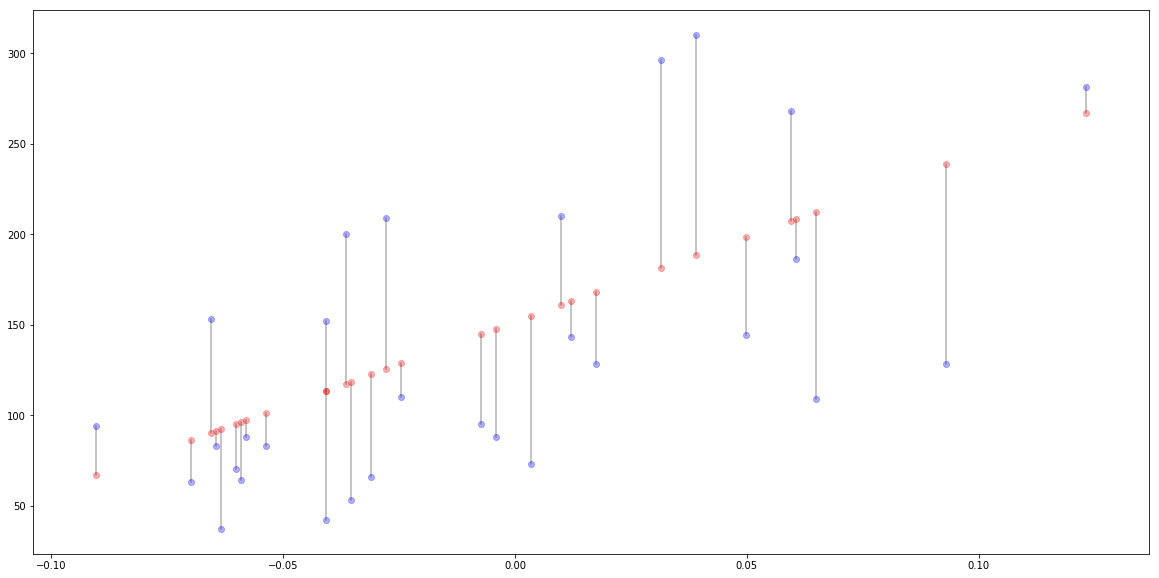

In [20]:
N_SAMPLES = 30
plt.scatter(X_test[:N_SAMPLES,0], y_test[:N_SAMPLES], alpha=0.3, c="blue")
plt.scatter(X_test[:N_SAMPLES,0], y_test_hat[:N_SAMPLES], alpha=0.3, c="red")
for i in range(N_SAMPLES):
    plt.plot([X_test[i, 0], X_test[i, 0]], [y_test[i], y_test_hat[i]], alpha=0.3, c="black")

#### Calculo de MSE en los datos de entrenamiento

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_train, y_train_hat), np.sqrt(mean_squared_error(y_train, y_train_hat))

(3858.042911043868, 62.113146040462865)

#### Calculo de MSE en los datos de test

In [22]:
mean_squared_error(y_test, y_test_hat), np.sqrt(mean_squared_error(y_test, y_test_hat))

(4022.4794409688698, 63.423019803292796)

Interpretando los valores anteriores:

In [23]:
Ntest= len(y_test)
muY = (1/Ntest) * sum(y_test)
D2Y = (1/Ntest) * sum((y_test - muY)**2)
MSE= mean_squared_error(y_test, y_test_hat)
R2 = 1 - MSE/D2Y
R2

0.3300118497405319